In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test))
test_loss = autoencoder.evaluate(x_test, x_test)
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2784 - val_loss: 0.1913
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1719 - val_loss: 0.1547
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1457 - val_loss: 0.1349
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1297 - val_loss: 0.1222
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1193 - val_loss: 0.1141
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1123 - val_loss: 0.1083
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1072 - val_loss: 0.1038
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1032 - val_loss: 0.1004
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1003 - val_loss: 0.0978
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0981 - val_loss: 0.0960
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0967 - val_loss: 0.0948
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [9]:
threshold = 0.5
correct_predictions = np.sum(
np.where(x_test >= threshold, 1, 0) ==
np.where(decoded_imgs >= threshold, 1, 0)
)
total_pixels = x_test.shape[0] * x_test.shape[1]
test_accuracy = correct_predictions / total_pixels
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.09146345406770706
Test Accuracy: 0.9713271683673469


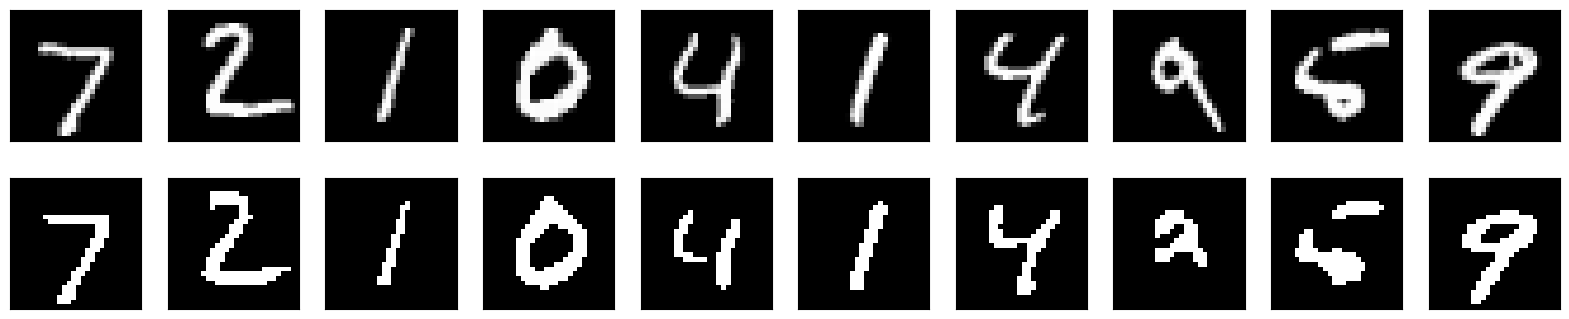

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    reconstruction = decoded_imgs[i].reshape(28, 28)
    plt.imshow(np.where(reconstruction >= threshold, 1.0, 0.0))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()